In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('data/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


This dataset consists of 8807 observations and 12 features. All of them except 'release_year' are represented by object type data.

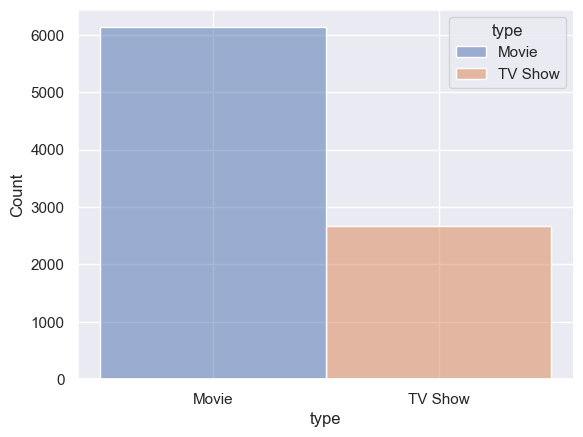

In [4]:
sns.histplot(data = data, x = 'type', hue = 'type')
plt.show()

The vast majority of netflix content is movies.

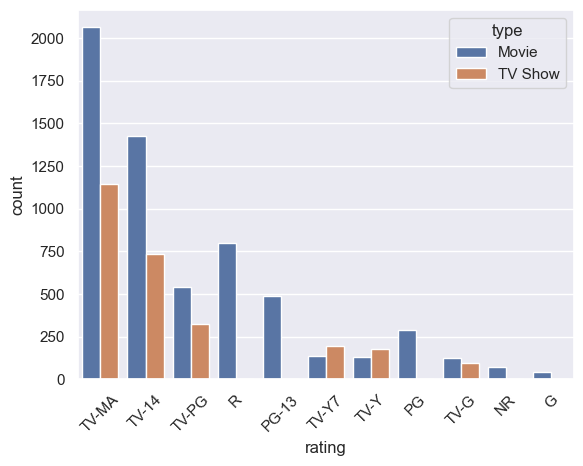

In [5]:
sns.countplot(data = data, x = 'rating', hue = 'type',
            order=data['rating'].value_counts().index[:11])
plt.xticks(rotation=45)
plt.show()

The three most popular age categories for both TV shows and movies on the platform are: TV-MA, TV-14 and TV-PG. Next most popular categories R and PG-13 as well as PG, NR and G are represented only by movies. The only two categories in which there are more TV shows than movies are TV-Y7 and TV-Y.

In [6]:
shows = data[data['type']=='TV Show']
movies = data[data['type']=='Movie']

In [7]:
pd.options.mode.chained_assignment = None
for i in data.index:
    if pd.notna(data.loc[i, 'duration']):
        if data.loc[i, 'type'] == 'Movie':
            movies.loc[i, 'duration'] = int(data.loc[i, 'duration'].split(' ')[0])
        else:
            shows.loc[i, 'duration'] = int(data.loc[i, 'duration'].split(' ')[0])

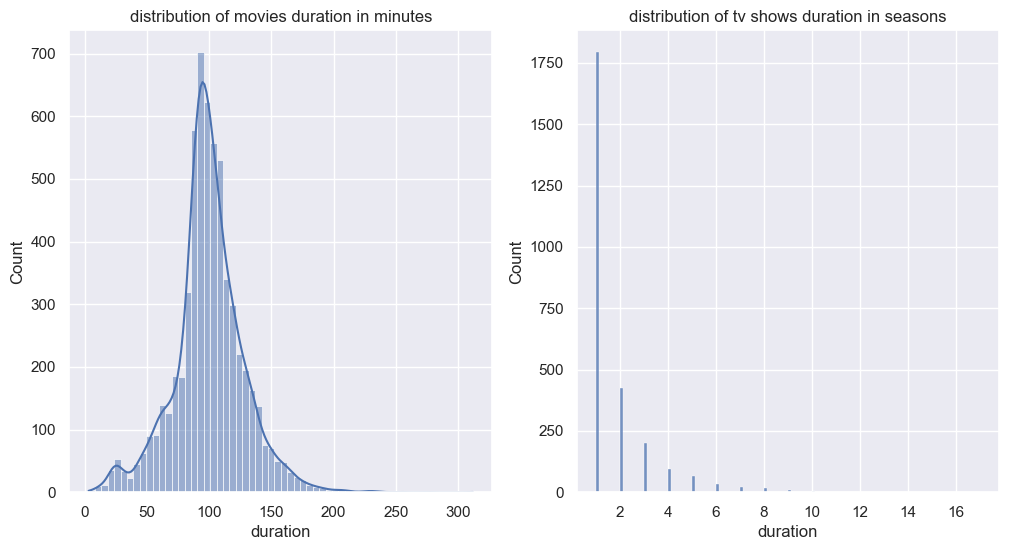

In [8]:
fix, ax = plt.subplots(1,2, figsize = (12,6))

sns.histplot(ax = ax[0], data = movies, x = 'duration', bins = 60, kde = True)
ax[0].set_title('distribution of movies duration in minutes')

sns.histplot(ax = ax[1], data = shows, x = 'duration')
ax[1].set_title('distribution of tv shows duration in seasons')

plt.show()

Most movies on netflix platform are between 80 and 115 minutes long. The vast majority of tv shows have only 1 season.

## Genres WordCloud

In [9]:
splited = []
for observation in data['listed_in'].values:
    observation = observation.split(', ')
    splited.extend(observation)

splited = pd.Series(splited)
splited = splited.sample(frac=1).reset_index(drop=True)

for i in range(len(splited)):
    splited[i] = splited[i].replace(' ', '_')
    splited[i] = splited[i].replace('&', 'and')
    splited[i] = splited[i].replace('-', '_')

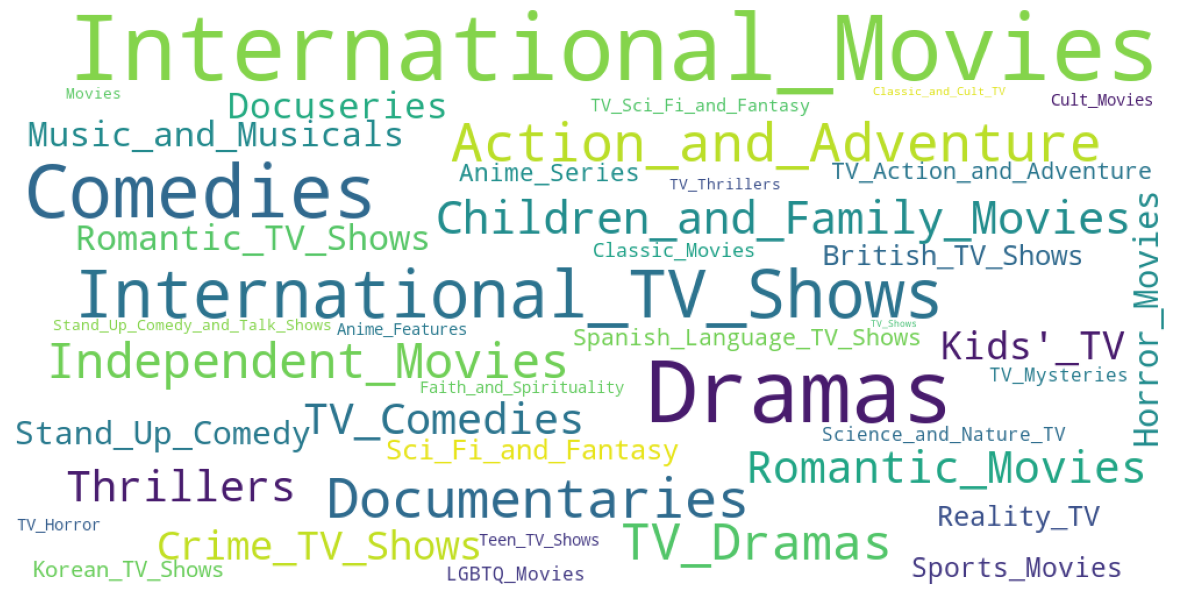

In [10]:
from wordcloud import WordCloud
unique_string=(' ').join(splited)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

International movies, dramas, comedies and international tv shows are top 4 genres with the most content on the netflix platform.

In [11]:
countries = data['country'].value_counts()[:15]

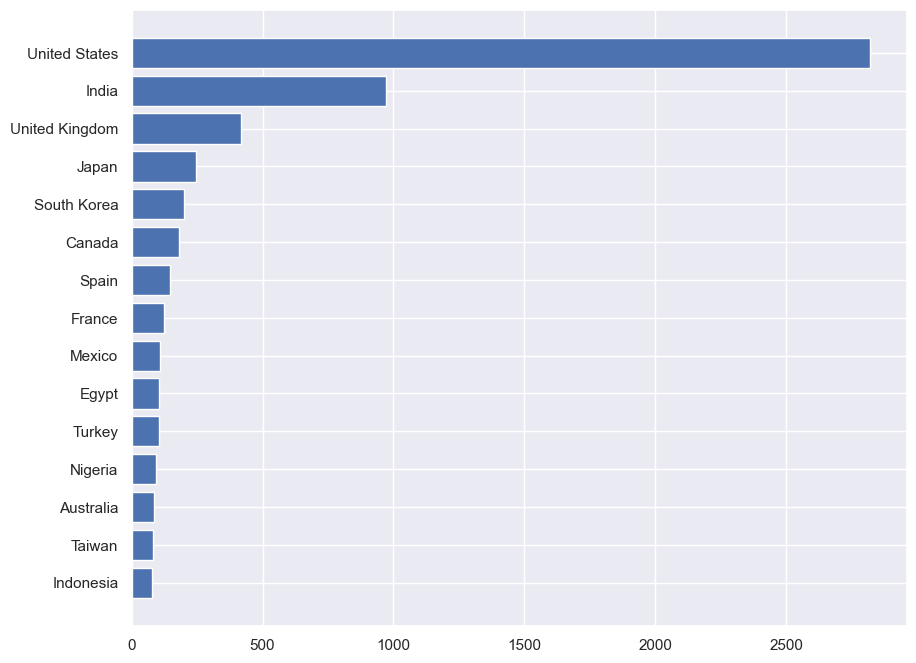

In [12]:
plt.figure(figsize=(10,8))
plt.barh(list(reversed(countries.index)), list(reversed(countries.values)))
plt.show()

The top three countries with the highest number of films and TV series produced are US, India and UK.

## Frequency of actors in domestic films

In [20]:
def function(cast):
    splited_cast = []
    for observation in cast.values:
        observation = observation.split(', ')
        splited_cast.extend(observation)

    cast_count = pd.Series(splited_cast).value_counts()[:10]
    return cast_count

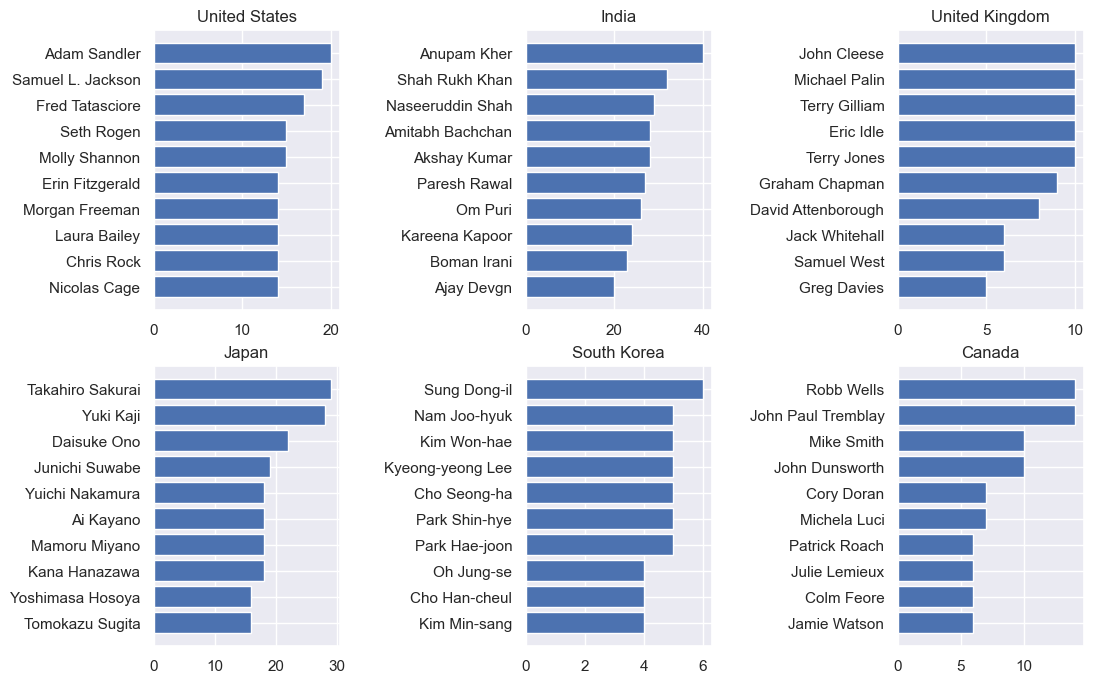

In [36]:
fig = plt.figure(figsize = (12,8))
#top 6 countries
for i, country in enumerate(countries.index[:6]):
    cast = data.loc[data['country']==country, 'cast'].dropna()
    cast_count = function(cast)
    ax = fig.add_subplot(2,3,i+1)
    ax.barh(list(reversed(cast_count.index)), list(reversed(cast_count.values)))
    ax.set_title(country)

plt.subplots_adjust(wspace=1)

In [13]:
movies_x = movies['release_year'].value_counts().index
movies_y = movies['release_year'].value_counts().values
m = pd.DataFrame(zip(movies_x, movies_y), columns = ['year', 'amount']).sort_values('year')

shows_x = shows['release_year'].value_counts().index
shows_y = shows['release_year'].value_counts().values
s = pd.DataFrame(zip(shows_x, shows_y), columns = ['year', 'amount']).sort_values('year')


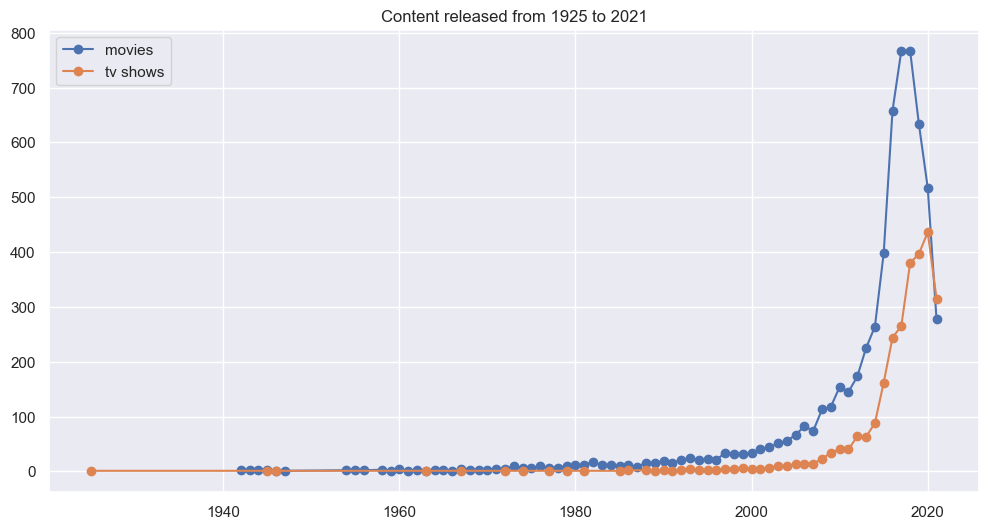

In [37]:
plt.figure(figsize=(12,6))
plt.plot(m['year'], m['amount'], '-o', label='movies')
plt.plot(s['year'], s['amount'], '-o', label='tv shows')
plt.legend()
plt.title('Content released from 1925 to 2021')
plt.show()